In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [46]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv")

In [47]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [49]:
desc_columns = ["car_ID", "CarName", ]

In [50]:
data.drop(desc_columns, axis=1, inplace = True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [52]:
objects = [column_name for column_name in data.columns if data[column_name].dtype == "object"]


In [53]:
data[objects].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   fueltype        205 non-null    object
 1   aspiration      205 non-null    object
 2   doornumber      205 non-null    object
 3   carbody         205 non-null    object
 4   drivewheel      205 non-null    object
 5   enginelocation  205 non-null    object
 6   enginetype      205 non-null    object
 7   cylindernumber  205 non-null    object
 8   fuelsystem      205 non-null    object
dtypes: object(9)
memory usage: 14.5+ KB


In [54]:
for columns in data[objects].columns:
  print(columns,"--------",data[columns].unique(),"--------", data[columns].nunique())
  print("_"*10)

fueltype -------- ['gas' 'diesel'] -------- 2
__________
aspiration -------- ['std' 'turbo'] -------- 2
__________
doornumber -------- ['two' 'four'] -------- 2
__________
carbody -------- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] -------- 5
__________
drivewheel -------- ['rwd' 'fwd' '4wd'] -------- 3
__________
enginelocation -------- ['front' 'rear'] -------- 2
__________
enginetype -------- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] -------- 7
__________
cylindernumber -------- ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight'] -------- 7
__________
fuelsystem -------- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] -------- 8
__________


In [55]:
data["doornumber"] = data["doornumber"].map({"two":2,"four":4}).astype("int64")

In [56]:
data["cylindernumber"] = data["cylindernumber"].map({"two":2,"three":3,"four":4,"five":5,"six":6,"eight":8,"twelve":12}).astype("int64")

In [57]:
objects = [column_name for column_name in data.columns if data[column_name].dtype == "object"]
for columns in data[objects].columns:
  print(columns,"--------",data[columns].unique(),"--------", data[columns].nunique())
  print("_"*10)

fueltype -------- ['gas' 'diesel'] -------- 2
__________
aspiration -------- ['std' 'turbo'] -------- 2
__________
carbody -------- ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop'] -------- 5
__________
drivewheel -------- ['rwd' 'fwd' '4wd'] -------- 3
__________
enginelocation -------- ['front' 'rear'] -------- 2
__________
enginetype -------- ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv'] -------- 7
__________
fuelsystem -------- ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi'] -------- 8
__________


<Axes: xlabel='fueltype', ylabel='price'>

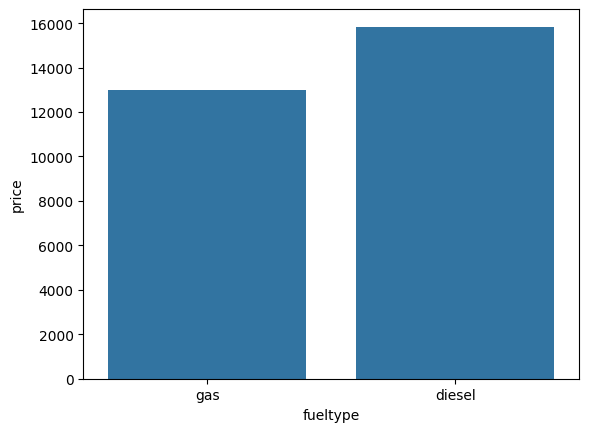

In [58]:
sns.barplot(x = "fueltype", y= "price", data = data, errorbar=("ci",0))

From the above chart we can clearly see that Diesel has higher price than Gas cars

<Axes: xlabel='doornumber', ylabel='price'>

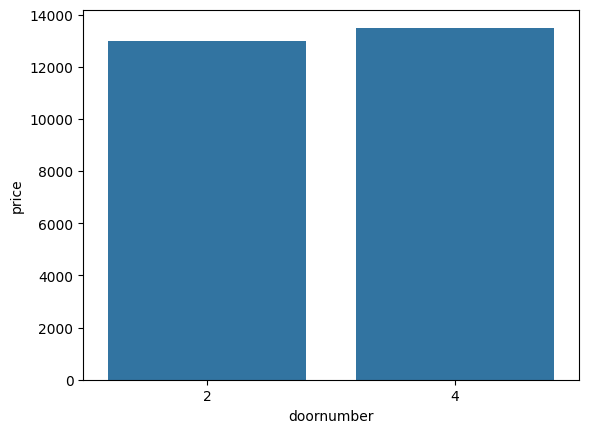

In [59]:
sns.barplot(x = "doornumber", y= "price", data = data, errorbar=("ci",0))

From the above chart there is no much difference in the price with respect to Door Number

<Axes: xlabel='enginetype', ylabel='price'>

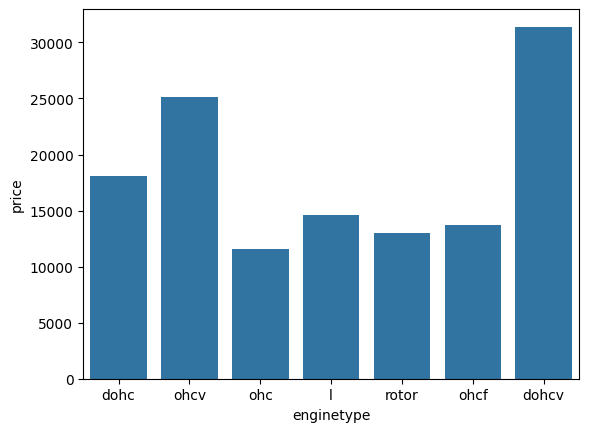

In [60]:
sns.barplot(x = "enginetype", y= "price", data = data, errorbar=("ci",0))

<Axes: xlabel='cylindernumber'>

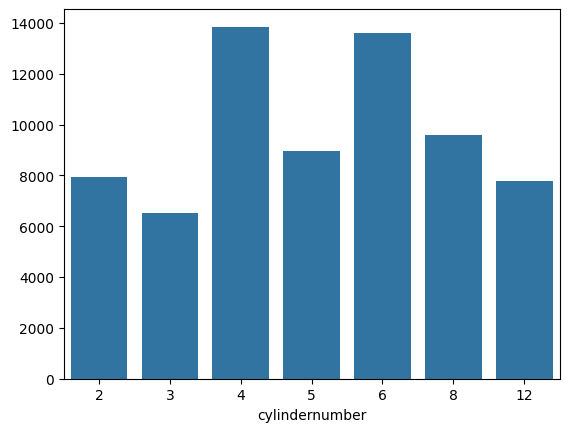

In [61]:
sns.barplot(x = data["cylindernumber"], y = sorted(data["price"]), errorbar=("ci",0))

In [62]:
objects

['fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [63]:
from sklearn.preprocessing import OneHotEncoder
oe = OneHotEncoder()
oe.fit(data[objects])
data[oe.get_feature_names_out()] = oe.transform(data[objects]).toarray().astype(int)

In [64]:
data.drop(objects, axis=1, inplace = True)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 46 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int64  
 1   doornumber            205 non-null    int64  
 2   wheelbase             205 non-null    float64
 3   carlength             205 non-null    float64
 4   carwidth              205 non-null    float64
 5   carheight             205 non-null    float64
 6   curbweight            205 non-null    int64  
 7   cylindernumber        205 non-null    int64  
 8   enginesize            205 non-null    int64  
 9   boreratio             205 non-null    float64
 10  stroke                205 non-null    float64
 11  compressionratio      205 non-null    float64
 12  horsepower            205 non-null    int64  
 13  peakrpm               205 non-null    int64  
 14  citympg               205 non-null    int64  
 15  highwaympg            2

In [66]:
data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,...,1,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,...,0,0,0,0,0,0,0,1,0,0


In [67]:
target = "price"
dependent = data.drop(target,axis=1)

In [73]:
from sklearn.metrics import mean_squared_error, r2_score, adjusted_rand_score, max_error, mean_absolute_error

def regression_report(ytrue, ypred):
    print("\n\n")

    print("\tRegression Report")
    print("_"*30)
    print(f"r2_score             :  {r2_score(ytrue, ypred)}")
    print(f"mean_squared_error   :  {mean_squared_error(ytrue, ypred)}")
    print(f"adjusted_rand_score  :  {adjusted_rand_score(ytrue, ypred)}")
    print(f"max_error            :  {max_error(ytrue, ypred)}")
    print(f"mean_absolute_error  :  {mean_absolute_error(ytrue, ypred)}")

In [ ]:
from sklearn.model_selection import train_test_split

In [74]:
X = dependent
Y = data[target]

In [76]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, train_size = .80, random_state = 33)

In [77]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((164, 45), (41, 45), (164,), (41,))

In [78]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)

print(f"Training Data : {lr.score(xtrain, ytrain)}")
print(f"Testing Data : {lr.score(xtest, ytest)}")

lrs = (lr.score(xtrain, ytrain),
       lr.score(xtest, ytest) )

regression_report(ytest,ypred)

Training Data : 0.9183588324240675
Testing Data : 0.909545764224026



	Regression Report
______________________________
r2_score             :  0.909545764224026
mean_squared_error   :  7168164.44979612
adjusted_rand_score  :  1.0
max_error            :  7222.528035953408
mean_absolute_error  :  2010.18960273457


In [79]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(xtrain, ytrain)
ypred = dt.predict(xtest)

print(f"Training Data : {dt.score(xtrain, ytrain)}")
print(f"Testing Data : {dt.score(xtest, ytest)}")

dts = (dt.score(xtrain, ytrain),
       dt.score(xtest, ytest) )

regression_report(ytest,ypred)

Training Data : 0.9989507023872043
Testing Data : 0.8425176758184181



	Regression Report
______________________________
r2_score             :  0.8425176758184181
mean_squared_error   :  12479893.152439024
adjusted_rand_score  :  0.0
max_error            :  12327.0
mean_absolute_error  :  2391.5243902439024


In [80]:
from sklearn.ensemble import RandomForestRegressor

rt = RandomForestRegressor()
rt.fit(xtrain, ytrain)
ypred = rt.predict(xtest)

print(f"Training Data : {rt.score(xtrain, ytrain)}")
print(f"Testing Data : {rt.score(xtest, ytest)}")

rts = (rt.score(xtrain, ytrain),
       rt.score(xtest, ytest) )

regression_report(ytest,ypred)

Training Data : 0.9894384184373065
Testing Data : 0.8991972318770676



	Regression Report
______________________________
r2_score             :  0.8991972318770676
mean_squared_error   :  7988247.456862286
adjusted_rand_score  :  0.0
max_error            :  7224.419999999998
mean_absolute_error  :  1922.5598934959348


In [82]:
from sklearn.ensemble import ExtraTreesRegressor

et = ExtraTreesRegressor()
et.fit(xtrain, ytrain)
ypred = et.predict(xtest)

print(f"Training Data : {et.score(xtrain, ytrain)}")
print(f"Testing Data : {et.score(xtest, ytest)}")

ets = (et.score(xtrain, ytrain),
       et.score(xtest, ytest) )

regression_report(ytest,ypred)

Training Data : 0.9989507023872043
Testing Data : 0.9317957334154554



	Regression Report
______________________________
r2_score             :  0.9317957334154554
mean_squared_error   :  5404936.483755128
adjusted_rand_score  :  1.0
max_error            :  7198.269999999997
mean_absolute_error  :  1581.8344707317078


In [83]:
labels = ["Linear Regressing", "DecisionTREE", "RandomForest", "ExtraTree"]
training_scores = [lrs[0], dts[0], rts[0], ets[0]]
testing_scores = [lrs[1], dts[1], rts[1], ets[1]]

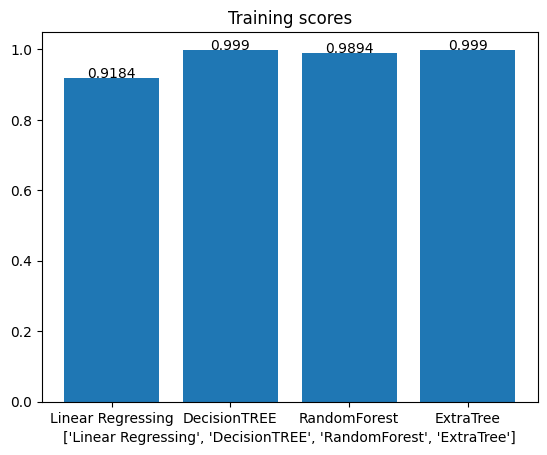

In [84]:
plt.title("Training scores")
plt.xlabel(labels)
plt.bar(labels,height =training_scores)
for i in range(len(labels)):
    plt.text(i,y=training_scores[i], s=np.round(training_scores[i],4), ha="center")

plt.show()

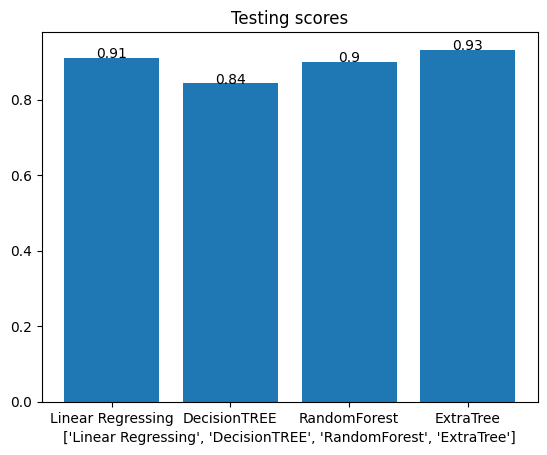

In [85]:
plt.title("Testing scores")
plt.xlabel(labels)
plt.bar(labels,height =testing_scores)
for i in range(len(labels)):
    plt.text(i,y=testing_scores[i], s=np.round(testing_scores[i],2), ha="center")

plt.show()